In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/5-faces-dataset/Five_Faces/musk/musk26.jpg
/kaggle/input/5-faces-dataset/Five_Faces/musk/musk77.jpg
/kaggle/input/5-faces-dataset/Five_Faces/musk/musk44.jpg
/kaggle/input/5-faces-dataset/Five_Faces/musk/musk35.jpg
/kaggle/input/5-faces-dataset/Five_Faces/musk/musk136.jpg
/kaggle/input/5-faces-dataset/Five_Faces/musk/musk5.jpg
/kaggle/input/5-faces-dataset/Five_Faces/musk/musk114.jpg
/kaggle/input/5-faces-dataset/Five_Faces/musk/musk30.jpg
/kaggle/input/5-faces-dataset/Five_Faces/musk/musk93.jpg
/kaggle/input/5-faces-dataset/Five_Faces/musk/musk129.jpg
/kaggle/input/5-faces-dataset/Five_Faces/musk/musk74.jpg
/kaggle/input/5-faces-dataset/Five_Faces/musk/musk115.jpg
/kaggle/input/5-faces-dataset/Five_Faces/musk/musk51.jpg
/kaggle/input/5-faces-dataset/Five_Faces/musk/musk130.jpg
/kaggle/input/5-faces-dataset/Five_Faces/musk/musk22.jpg
/kaggle/input/5-faces-dataset/Five_Faces/musk/musk113.jpg
/kaggle/input/5-faces-dataset/Five_Faces/musk/musk19.jpg
/kaggle/input/5-faces-data

In [2]:
!pip install kaggle

In [3]:
from fastai.vision.widgets import *

In [4]:
from fastai.vision.all import *


In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anku5hk/5-faces-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/5-faces-dataset


In [6]:
# Define the path to your dataset
data_path = Path("/kaggle/input/5-faces-dataset/Five_Faces")
data_path.ls()  # Check the folders inside


(#5) [Path('/kaggle/input/5-faces-dataset/Five_Faces/musk'),Path('/kaggle/input/5-faces-dataset/Five_Faces/trump'),Path('/kaggle/input/5-faces-dataset/Five_Faces/modi'),Path('/kaggle/input/5-faces-dataset/Five_Faces/jack'),Path('/kaggle/input/5-faces-dataset/Five_Faces/gates')]

In [7]:
dls_1 = ImageDataLoaders.from_folder(
    data_path, 
    valid_pct=0.2,  # 20% images for validation
    item_tfms=Resize(224),  # Resize images to 224x224
    batch_tfms=aug_transforms()  # Apply data augmentation
)



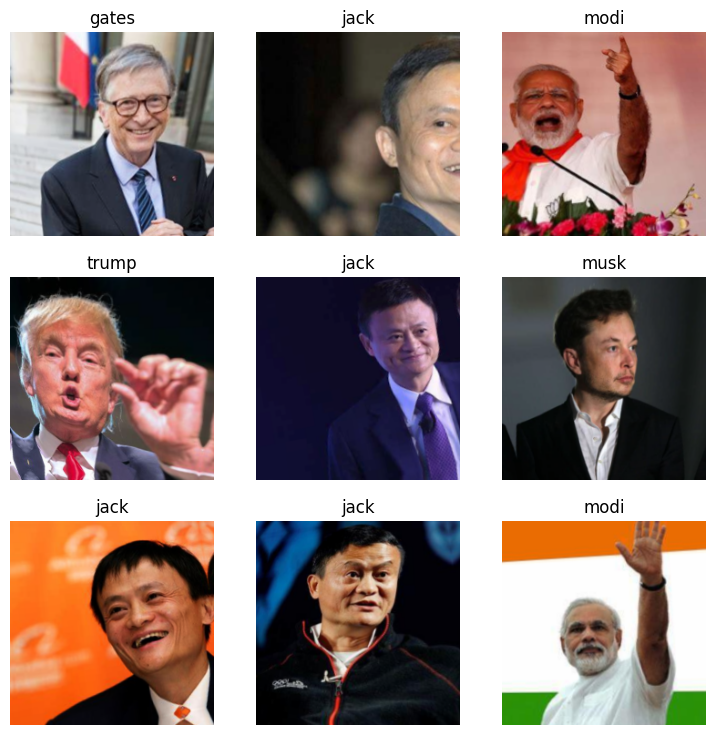

In [8]:
dls_1.show_batch(max_n=9)


In [9]:
faces = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files, 
    splitter=RandomSplitter(seed=42),
    get_y=parent_label,  # Labels are folder names
    item_tfms=Resize(460),  # Step 1: Resize to a larger size
    batch_tfms=aug_transforms(size=224)  # Step 2: Apply augmentation & final resize
)

dls = faces.dataloaders("/kaggle/input/5-faces-dataset")


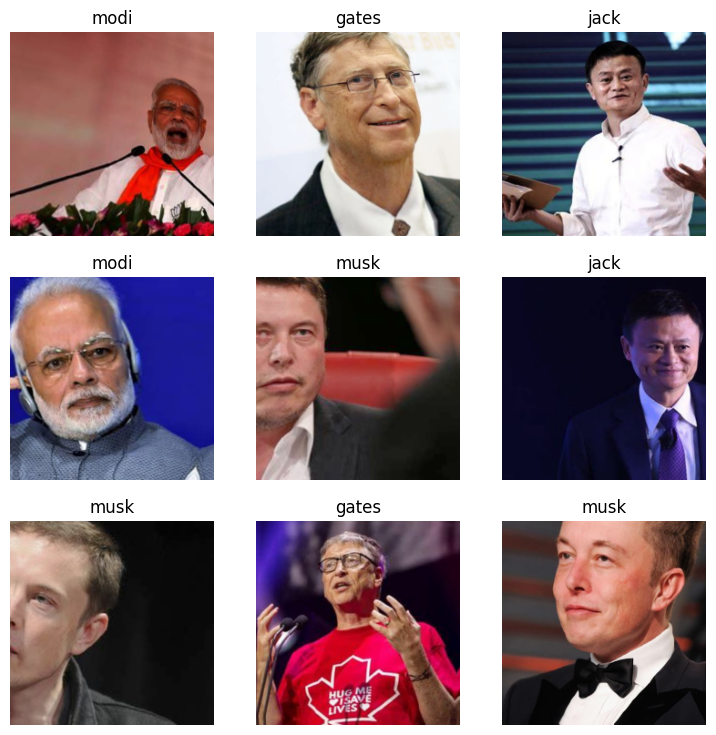

In [10]:
dls.show_batch(max_n=9)


In [11]:
learn = vision_learner(dls, resnet18, metrics = error_rate )
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 191MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.065961,1.069805,0.384058,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.634445,0.353598,0.152174,00:03
1,0.424946,0.122180,0.057971,00:03
2,0.300695,0.094077,0.028986,00:03
3,0.238047,0.094569,0.021739,00:03


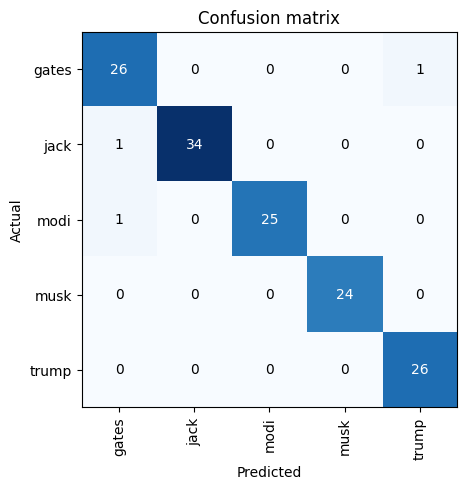

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

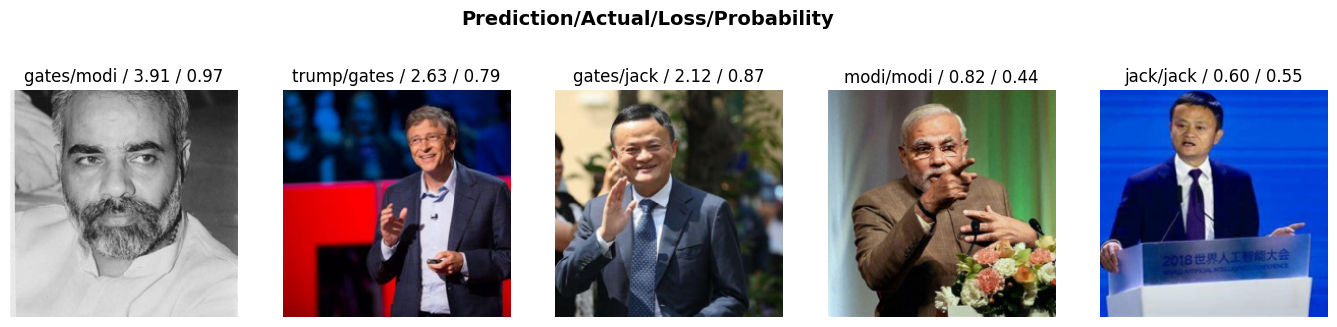

In [13]:
interp.plot_top_losses(5, nrows=1, figsize=(17,4))

In [14]:
learn.export('model.pkl')

__deployment__


In [16]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 29.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.0/322.0 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 92.7 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
Note: you may need to restart the kernel to use updated packages.


In [17]:
#from fastai.vision.all import *
import gradio as gr

# Load your trained model
learn = load_learner('model.pkl')


In [18]:
def predict_image(img):
    pred_class, pred_idx, probs = learn.predict(img)
    return {learn.dls.vocab[i]: float(probs[i]) for i in range(len(probs))}


In [20]:
interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil"),  # Use 'type="pil"' to ensure compatibility
    outputs=gr.Label(),
    title="Face Recognition Model",
    description="Upload an image and the model will predict who it is."
)


In [21]:
interface.launch()


* Running on local URL:  http://127.0.0.1:7860
Kaggle notebooks require sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://4e53205ae78ecf5627.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
